# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [72]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Let's generate our dataset and take a look on it.

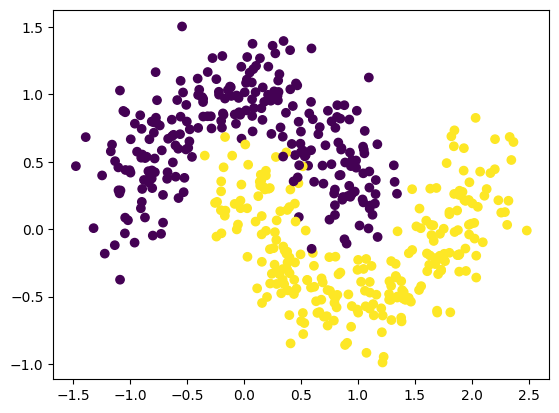

In [73]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2, random_state=42)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

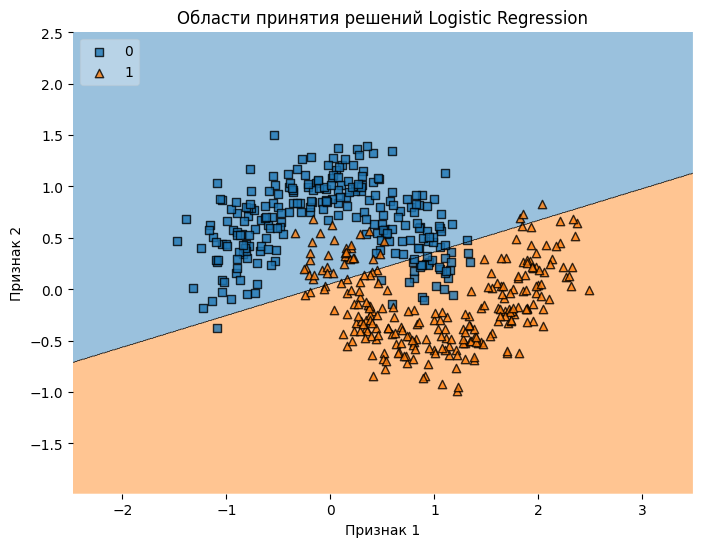

Точность Logistic Regression: 0.86


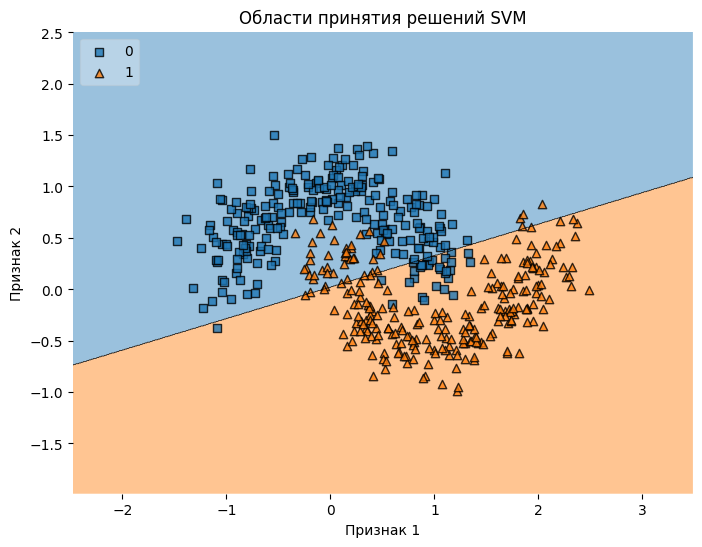

Точность SVM: 0.85


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Функция для построения областей принятия решений
def plot_decisions(estimator, X, y, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(title)
    plt.show()

# Построение областей принятия решений и вычисление точности
plot_decisions(lr, moons_points, moons_labels, 'Области принятия решений Logistic Regression')
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Точность Logistic Regression: {lr_accuracy:.2f}")

plot_decisions(svm, moons_points, moons_labels, 'Области принятия решений SVM')
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Точность SVM: {svm_accuracy:.2f}")

#### Точки имеют нелинейную разделяющую поверхность. Очевидно, что линейный классификатор будет работать здесь плохо

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Лучшие параметры: Kernel: rbf, Degree: 2, C: 10, Gamma: 1
Лучшая точность: 0.98


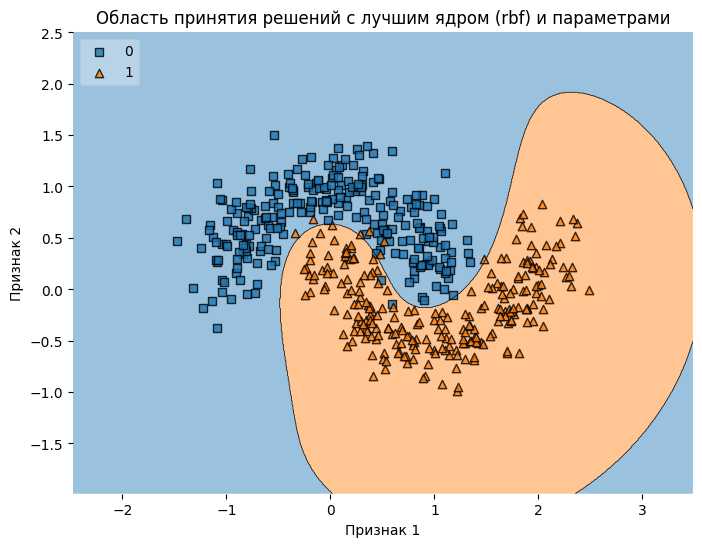

In [53]:
# Функция для оценки SVM с различными ядрами и параметрами
def evaluate_svm_kernel(kernel, degree=3, C=1.0, gamma='scale'):
    svm = SVC(kernel=kernel, degree=degree, C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return svm, accuracy

# Список для хранения результатов
results = []

# Оценка SVM с разными ядрами и параметрами
kernels = ['poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]
for kernel in kernels:
    for degree in degrees:
        for C in C_values:
            for gamma in gamma_values:
                svm, accuracy = evaluate_svm_kernel(kernel, degree, C, gamma)
                results.append((kernel, degree, C, gamma, accuracy))

# Нахождение наилучших параметров
best_result = max(results, key=lambda x: x[4])
best_kernel, best_degree, best_C, best_gamma, best_accuracy = best_result

print(f"Лучшие параметры: Kernel: {best_kernel}, Degree: {best_degree}, C: {best_C}, Gamma: {best_gamma}")
print(f"Лучшая точность: {best_accuracy:.2f}")

# Построение области принятия решений с лучшим ядром и параметрами
svm, _ = evaluate_svm_kernel(best_kernel, best_degree, best_C, best_gamma)
plot_decisions(svm, moons_points, moons_labels, 
               f'Область принятия решений с лучшим ядром ({best_kernel}) и параметрами')

Точность классификации возросла с 0.85 до 0.98. Изменение "ядра" в методе позволяет модели создавать нелинейные границы принятия решений. Фактически мы изменяем пространство признаков, искажая его таким образом, чтобы в новом пространстве объекты стали линейно разделимы. Возвращаясь к исходному пространству, окажется, что мы проводим нелинейные границы. Degree - это степень, в которую мы возводим скалярное произведение признаков. Чем выше степень, тем сложнее возможно граница. Собственно, как в ряде Тейлора :)

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

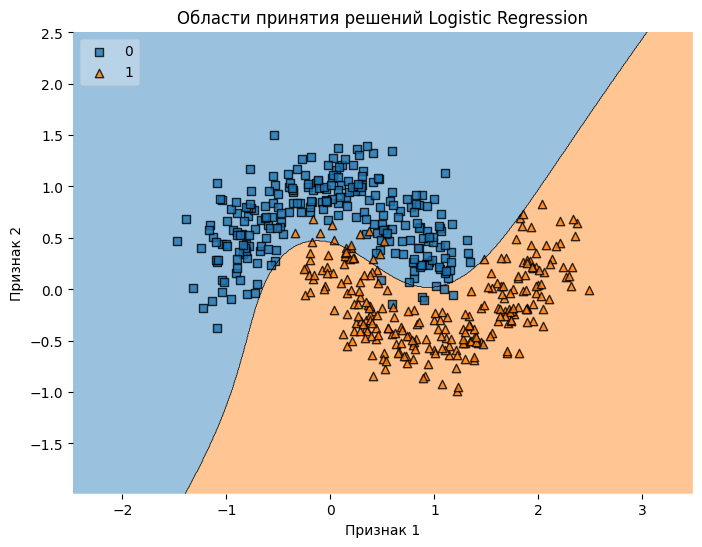

Точность логистической регрессии (Полином степени 3): 0.95


In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3 # Вы можете настроить степень полинома
model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LogisticRegression())

# Обучение логистической регрессии на новых признаках
model.fit(X_train, y_train)

# Построение областей принятия решений для логистической регрессии
plot_decisions(model, moons_points, moons_labels, 'Области принятия решений Logistic Regression')

# Вычисление точности для логистической регрессии
y_pred_lr = model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Точность логистической регрессии (Полином степени {degree}): {lr_accuracy:.2f}")

Оптимальная степень полинома = 3. При полиномах более высоких степеней, границы начинают проводиться слишком абстрактным образом по пустому пространству. В сравнении с SVM качество хуже 0.95 против 0.98. В SVM использовался RBF kernel, который позволяет создавать границы для задач далеких от линейного разделения. Полином же третьей степени - это что-то из гиперборл, т.е. всё таже линия но с парой изгибов. Таким обарзом, LR выдается всё таки более "топорное" решение, чем SVM c RBF kernel. И как можно видеть из рисунка разделяющих границ, границы LR в большей степени проходят по пустому пространству, т.е. произвольно.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

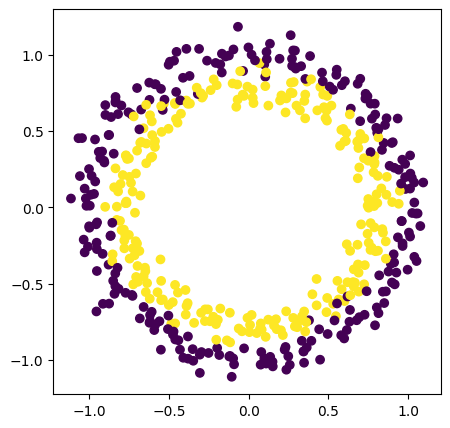

In [77]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

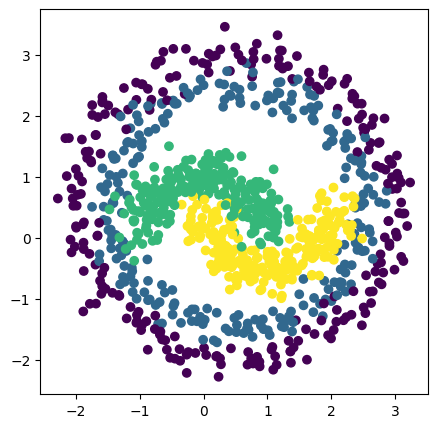

In [78]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Лучшие параметры: Kernel: poly, Degree: 4, C: 0.1, Gamma: 1
Лучшая точность: 0.96


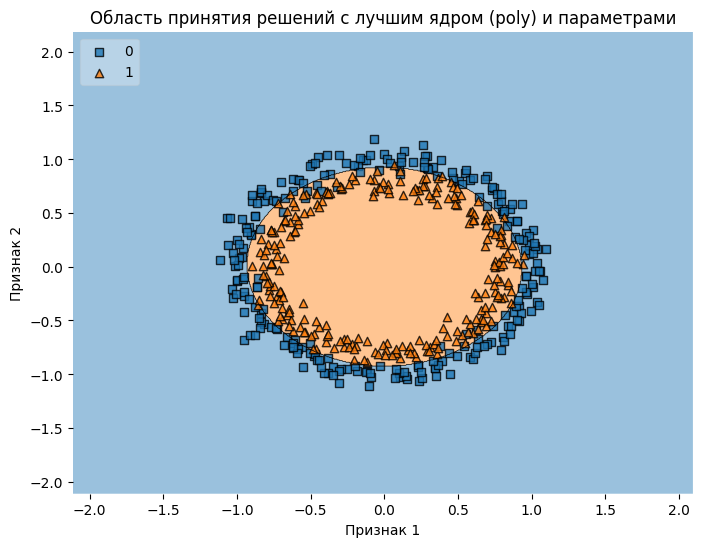

In [79]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.2, random_state=42)

# Список для хранения результатов
results = []

# Оценка SVM с разными ядрами и параметрами
kernels = ['poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]
for kernel in kernels:
    for degree in degrees:
        for C in C_values:
            for gamma in gamma_values:
                svm, accuracy = evaluate_svm_kernel(kernel, degree, C, gamma)
                results.append((kernel, degree, C, gamma, accuracy))

# Нахождение наилучших параметров
best_result = max(results, key=lambda x: x[4])
best_kernel, best_degree, best_C, best_gamma, best_accuracy = best_result

print(f"Лучшие параметры: Kernel: {best_kernel}, Degree: {best_degree}, C: {best_C}, Gamma: {best_gamma}")
print(f"Лучшая точность: {best_accuracy:.2f}")

# Построение области принятия решений с лучшим ядром и параметрами
svm, _ = evaluate_svm_kernel(best_kernel, best_degree, best_C, best_gamma)
plot_decisions(svm, circles_points, circles_labels, f'Область принятия решений с лучшим ядром ({best_kernel}) и параметрами')


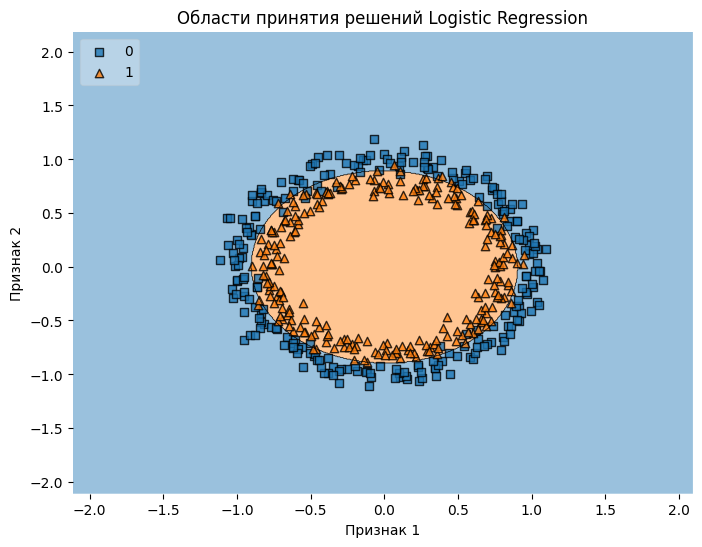

Точность логистической регрессии (Полином степени 2): 0.95


In [80]:
degree = 2 # Вы можете настроить степень полинома
model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LogisticRegression())

# Обучение логистической регрессии на новых признаках
model.fit(X_train, y_train)

# Построение областей принятия решений для логистической регрессии
plot_decisions(model, circles_points, circles_labels, 'Области принятия решений Logistic Regression')

# Вычисление точности для логистической регрессии
y_pred_lr = model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Точность логистической регрессии (Полином степени {degree}): {lr_accuracy:.2f}")

Лучшие параметры: Kernel: rbf, Degree: 2, C: 1, Gamma: 1
Лучшая точность: 0.94


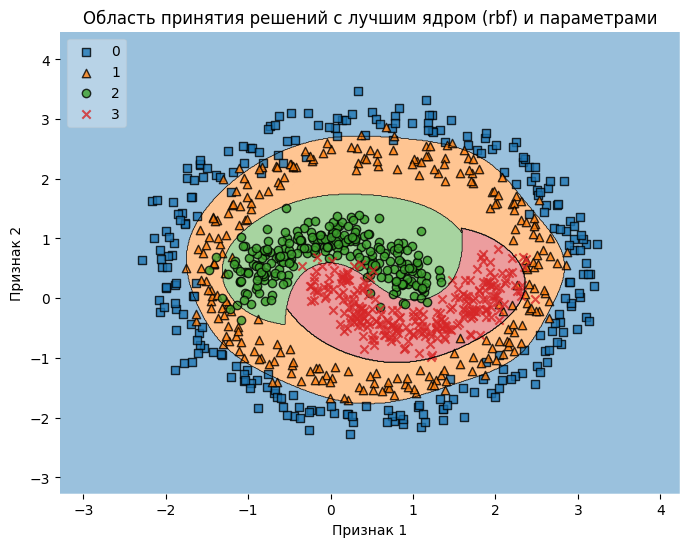

In [90]:
import warnings

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=42)

def evaluate_svm_kernel(kernel, degree=3, C=1.0, gamma='scale'):
    svm = SVC(kernel=kernel, degree=degree, C=C, gamma=gamma, decision_function_shape='ovr')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return svm, accuracy

warnings.filterwarnings('ignore')
# Список для хранения результатов
results = []

# Оценка SVM с разными ядрами и параметрами
kernels = ['poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]
for kernel in kernels:
    for degree in degrees:
        for C in C_values:
            for gamma in gamma_values:
                svm, accuracy = evaluate_svm_kernel(kernel, degree, C, gamma)
                results.append((kernel, degree, C, gamma, accuracy))

# Нахождение наилучших параметров
best_result = max(results, key=lambda x: x[4])
best_kernel, best_degree, best_C, best_gamma, best_accuracy = best_result

print(f"Лучшие параметры: Kernel: {best_kernel}, Degree: {best_degree}, C: {best_C}, Gamma: {best_gamma}")
print(f"Лучшая точность: {best_accuracy:.2f}")

# Построение области принятия решений с лучшим ядром и параметрами
svm, _ = evaluate_svm_kernel(best_kernel, best_degree, best_C, best_gamma)
plot_decisions(svm, points, labels, 
               f'Область принятия решений с лучшим ядром ({best_kernel}) и параметрами')

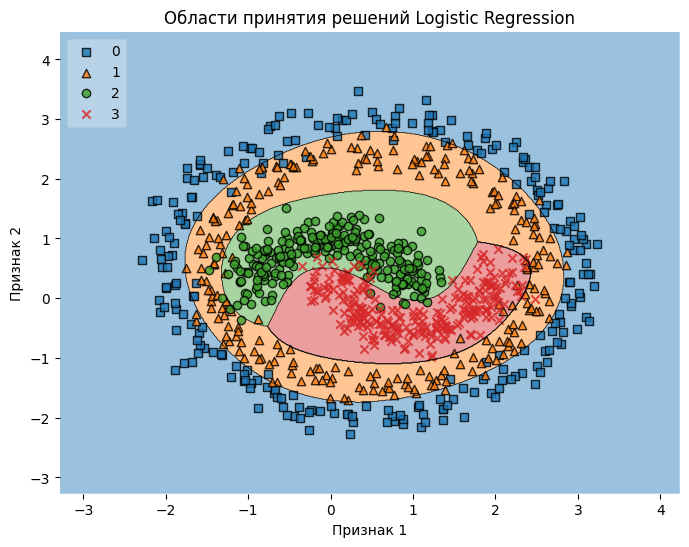

Точность логистической регрессии (Полином степени 4): 0.93


In [91]:
degree = 4 # Вы можете настроить степень полинома
model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LogisticRegression())

# Обучение логистической регрессии на новых признаках
model.fit(X_train, y_train)

# Построение областей принятия решений для логистической регрессии
plot_decisions(model, points, labels, 'Области принятия решений Logistic Regression')

# Вычисление точности для логистической регрессии
y_pred_lr = model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Точность логистической регрессии (Полином степени {degree}): {lr_accuracy:.2f}")

### Justify the results in a few phrases:

LR работает с нелинейными данными хуже, чем SVM with Kernel trick. Это видно как по качеству, так и по границам, так и потому, что на последней задаче была куча варнингов и LR судя по всему очень сложно сходилась :)) 